In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/GitHub/ERA-V1/Assignments/S7

Mounted at /content/drive
/content/drive/MyDrive/GitHub/ERA-V1/Assignments/S7


# Import Libraries

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations



In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# The model

In [ ]:
from model import Model2 as Net
model = Net()

# Model Params

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 11, 26, 26]              99
              ReLU-2           [-1, 11, 26, 26]               0
            Conv2d-3           [-1, 11, 24, 24]           1,089
              ReLU-4           [-1, 11, 24, 24]               0
         MaxPool2d-5           [-1, 11, 12, 12]               0
            Conv2d-6           [-1, 14, 10, 10]           1,386
              ReLU-7           [-1, 14, 10, 10]               0
            Conv2d-8             [-1, 14, 8, 8]           1,764
              ReLU-9             [-1, 14, 8, 8]               0
        MaxPool2d-10             [-1, 14, 4, 4]               0
           Conv2d-11             [-1, 16, 2, 2]           2,016
             ReLU-12             [-1, 16, 2, 2]               0

# Training and Testing



In [ ]:
from utils import train, test, plot_graph

# Let's Train and test our model

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Loss=0.2043 Batch_id=468 Accuracy=68.60: 100%|██████████| 469/469 [00:17<00:00, 26.33it/s]


Test set: Average loss: 0.0011, Accuracy: 9561/10000 (95.61%)

Epoch 2


Train: Loss=0.0562 Batch_id=468 Accuracy=96.20: 100%|██████████| 469/469 [00:16<00:00, 28.54it/s]


Test set: Average loss: 0.0007, Accuracy: 9732/10000 (97.32%)

Epoch 3


Train: Loss=0.1896 Batch_id=468 Accuracy=97.29: 100%|██████████| 469/469 [00:16<00:00, 28.28it/s]


Test set: Average loss: 0.0005, Accuracy: 9803/10000 (98.03%)

Epoch 4


Train: Loss=0.0803 Batch_id=468 Accuracy=97.84: 100%|██████████| 469/469 [00:17<00:00, 26.16it/s]


Test set: Average loss: 0.0005, Accuracy: 9787/10000 (97.87%)

Epoch 5


Train: Loss=0.1270 Batch_id=468 Accuracy=98.07: 100%|██████████| 469/469 [00:16<00:00, 28.66it/s]


Test set: Average loss: 0.0004, Accuracy: 9843/10000 (98.43%)

Epoch 6


Train: Loss=0.0508 Batch_id=468 Accuracy=98.34: 100%|██████████| 469/469 [00:16<00:00, 28.53it/s]


Test set: Average loss: 0.0004, Accuracy: 9858/10000 (98.58%)

Epoch 7


Train: Loss=0.0151 Batch_id=468 Accuracy=98.46: 100%|██████████| 469/469 [00:19<00:00, 24.19it/s]


Test set: Average loss: 0.0004, Accuracy: 9847/10000 (98.47%)

Epoch 8


Train: Loss=0.0512 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:16<00:00, 28.68it/s]


Test set: Average loss: 0.0005, Accuracy: 9814/10000 (98.14%)

Epoch 9


Train: Loss=0.0046 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:16<00:00, 28.45it/s]


Test set: Average loss: 0.0004, Accuracy: 9853/10000 (98.53%)

Epoch 10


Train: Loss=0.0293 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:16<00:00, 28.17it/s]


Test set: Average loss: 0.0004, Accuracy: 9868/10000 (98.68%)

Epoch 11


Train: Loss=0.0212 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:16<00:00, 28.46it/s]


Test set: Average loss: 0.0003, Accuracy: 9878/10000 (98.78%)

Epoch 12


Train: Loss=0.0063 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:16<00:00, 28.60it/s]


Test set: Average loss: 0.0003, Accuracy: 9886/10000 (98.86%)

Epoch 13


Train: Loss=0.0466 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:16<00:00, 28.27it/s]


Test set: Average loss: 0.0003, Accuracy: 9883/10000 (98.83%)

Epoch 14


Train: Loss=0.0173 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:16<00:00, 27.91it/s]


Test set: Average loss: 0.0004, Accuracy: 9867/10000 (98.67%)

Epoch 15


Train: Loss=0.0348 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:16<00:00, 28.57it/s]


Test set: Average loss: 0.0004, Accuracy: 9868/10000 (98.68%)



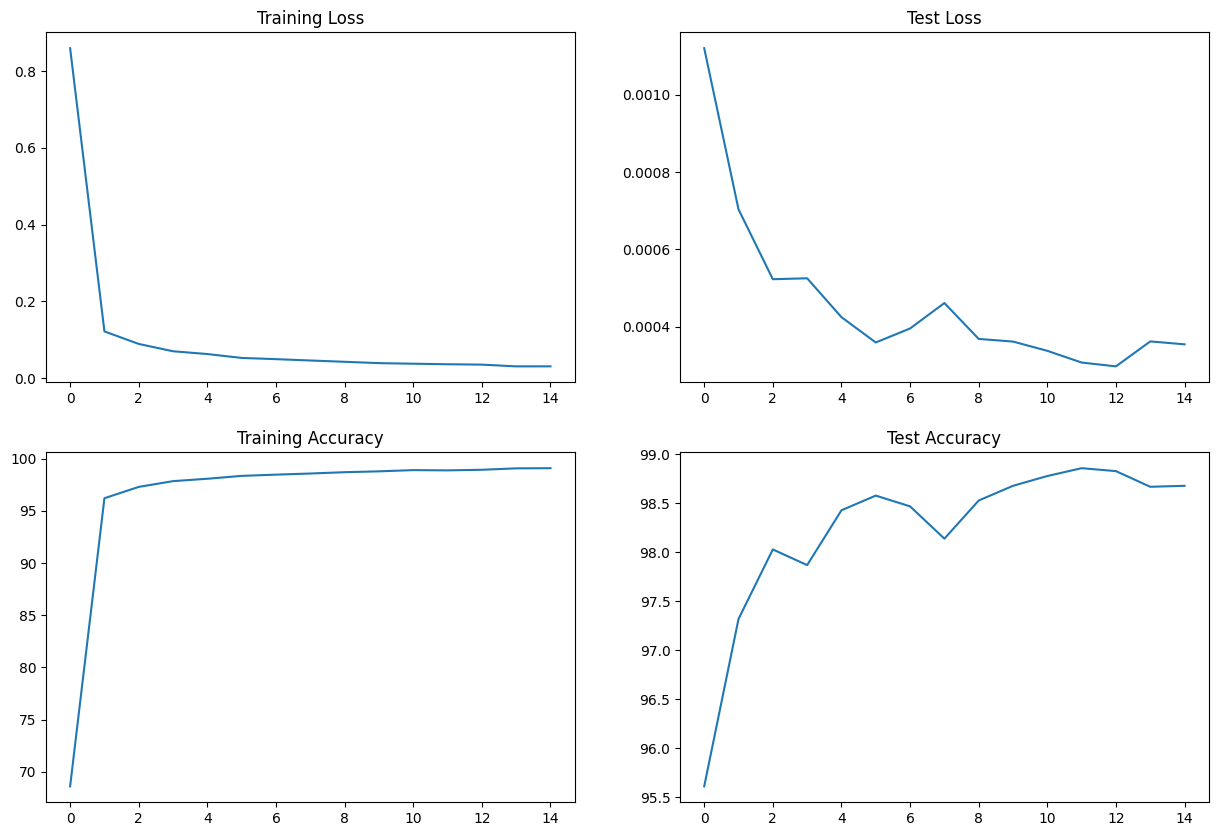

In [ ]:
plot_graph()

## Model 2

### Target
* Make Model lighter

### Results:
* Parameters: 6,514
* Best Train Accuracy: 99.08
* Best Test Accuracy: 98.86

### Analysis:
* Good model!
* No Overfitting. Model is capable if pushed further